In [23]:
#TRIAL1
#COSMOLOGY - ASSIGNMENT
#THE WORLD WITHOUT ASTRONOMY

#Importing necessary libraries:
import numpy as np
import matplotlib
import matplotlib as mpl
from astropy.io import fits
from scipy import stats
from astropy.modeling import models
import astropy.units as u
from specutils import Spectrum1D, SpectralRegion
import matplotlib.pyplot as plt
mpl.style.use('seaborn-whitegrid')

In [24]:
#loading the fits file:
#The open function returns an object called an HDUList which is a list-like collection of Header Data Unit (HDU) objects. 
#An HDU is the highest level component of the FITS file structure,consisting of a header and (typically) a data array or table.
#HDUList.info() summarizes the content of the opened FITS file:
hdul = fits.open('spectrum.fits')
hdul.info()

#defining arrays and importing data:
lamda = hdul[1].data['wave']
nflux = hdul[1].data['flux']
error = hdul[1].data['error']

Filename: spectrum.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     14   164553R x 3C   [D, D, D]   


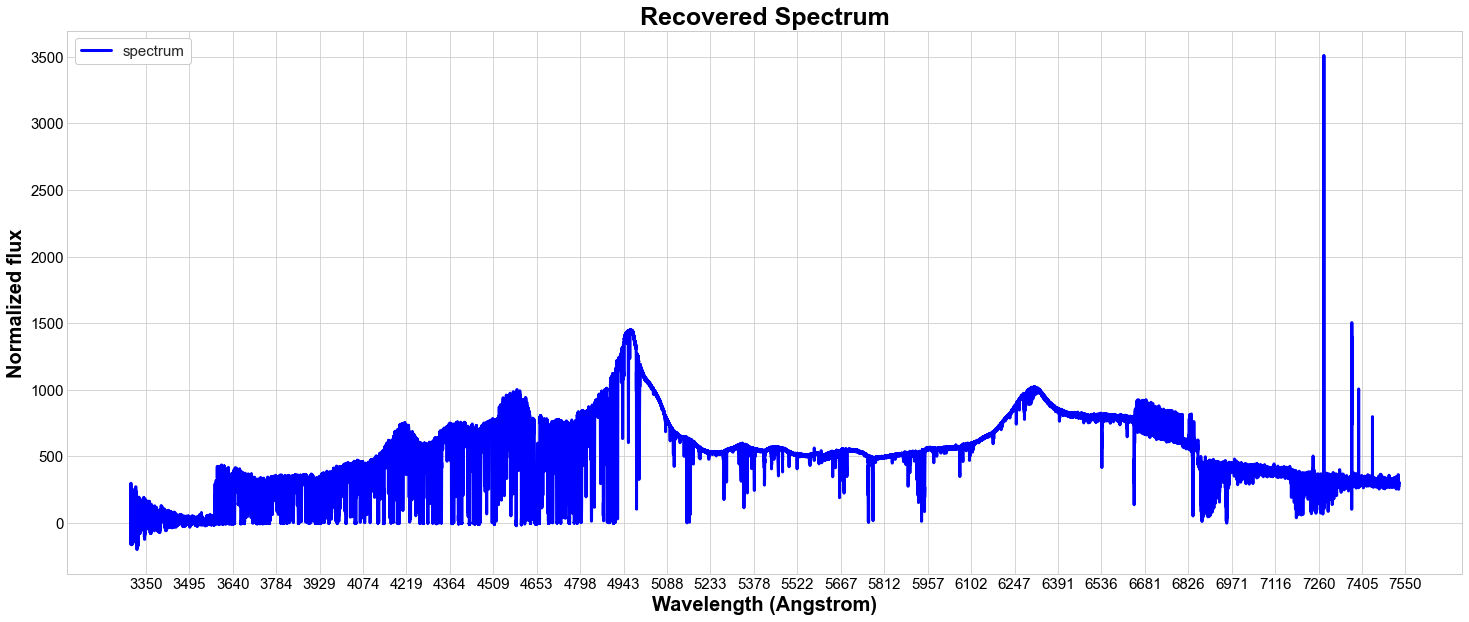

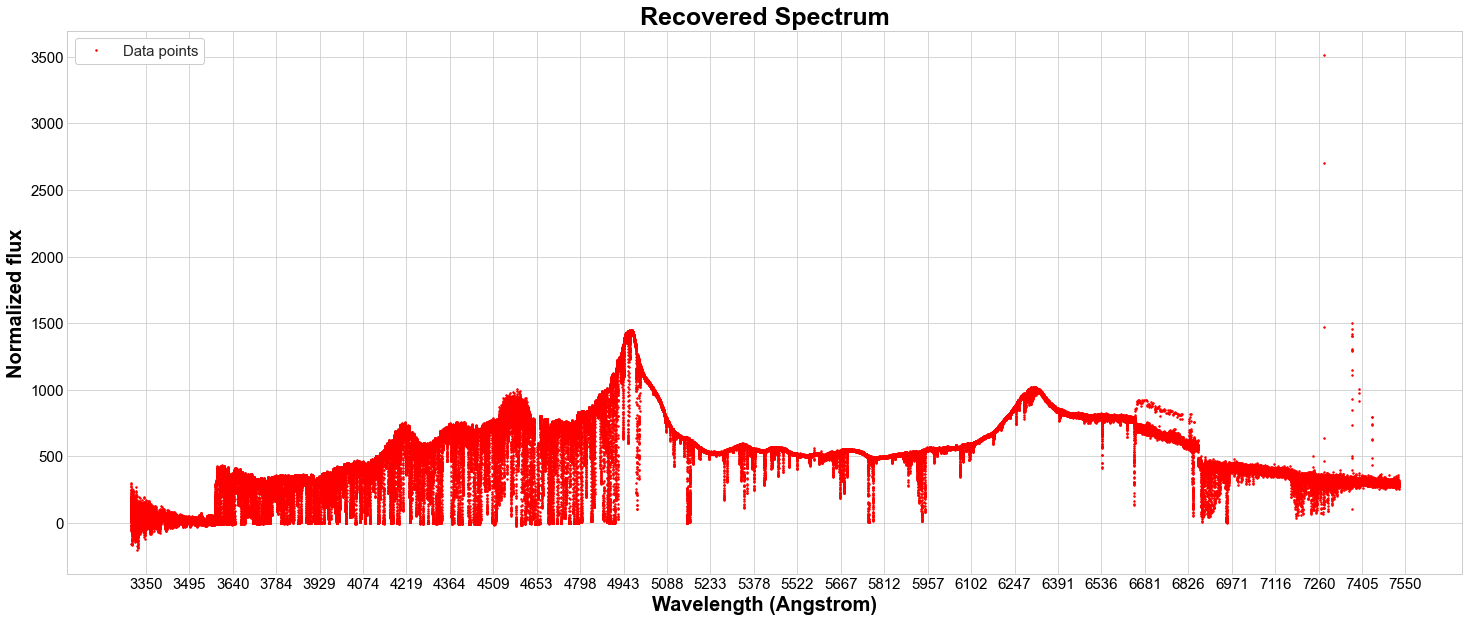

In [25]:
#plotting the spectrum to see different wavelengths:
plt.figure(figsize=(25,10))
plt.plot(lamda,nflux,'b-',linewidth='3',label ='spectrum')
plt.title("Recovered Spectrum",fontsize=25,fontweight='bold', color="black")
plt.xlabel("Wavelength (Angstrom)",fontsize=20,fontweight='bold',color="black")
plt.ylabel("Normalized flux",fontsize=20,fontweight='bold',color="black")
plt.xticks(np.linspace(3350,7550,30),fontsize=15, color="black")
plt.yticks(np.linspace(0,3500,8),fontsize=15, color="black")
plt.legend(loc = "upper left",fontsize=15,framealpha=1, frameon=True)
plt.savefig("PLOTa")
plt.show()
#plotting the spectrum to data points:
plt.figure(figsize=(25,10))
plt.plot(lamda,nflux,'r.',markersize='3',label ='Data points')
plt.title("Recovered Spectrum",fontsize=25,fontweight='bold', color="black")
plt.xlabel("Wavelength (Angstrom)",fontsize=20,fontweight='bold',color="black")
plt.ylabel("Normalized flux",fontsize=20,fontweight='bold',color="black")
plt.xticks(np.linspace(3350,7550,30),fontsize=15, color="black")
plt.yticks(np.linspace(0,3500,8),fontsize=15, color="black")
plt.legend(loc = "upper left",fontsize=15,framealpha=1, frameon=True)
plt.savefig("PLOTb")
plt.show()

In [26]:
#Finding the lyman alpha peak:
index1 = np.where(lamda == 4943)
index2 = np.where(lamda == 5000)
#print(index1)
#print(index2)
array1 = lamda[68540:70899]
array2 = nflux[68540:70899]
#print(len(array1))
index_a = np.where(nflux == np.amax(array2) )
#print(index_a)
LyAlpha_obs = lamda[index_a]
LyAlpha_flux = nflux[index_a]
print(LyAlpha_obs)
print(LyAlpha_flux)
print("Lyman Alpha Peak : ",LyAlpha_obs,"A")

[4964.47]
[1450.76]
Lyman Alpha Peak :  [4964.47] A


In [27]:
#Finding the redshift:
LyAlpha_rest = 1215.67  #in Angstrom, from theory

Redshift   = ((LyAlpha_obs/LyAlpha_rest) - 1)
print(" Redshift of the quasar : Z = ", Redshift)

 Redshift of the quasar : Z =  [3.0837316]


In [28]:
#Finding the lyman beta peak:
index3 = np.where(lamda == 4509)
index4 = np.where(lamda == 4653)
#print(index3)
#print(index4)

array3 = lamda[51492:57213]
array4 = nflux[51492:57213]
#print(len(array3))
index_b = np.where(nflux == np.amax(array4) )
#print(index_b)
LyBeta_obs = lamda[index_b]
LyBeta_flux = nflux[index_b]
print(LyBeta_obs)
print(LyBeta_flux)

print("Lyman Beta Peak : ",LyBeta_obs,"A")

[4587.41]
[1001.81]
Lyman Beta Peak :  [4587.41] A


In [29]:
#Finding the lyman break:
index5 = np.where(lamda == 3580.51)
index6 = np.where(lamda == 3571.11)
#print(index5)
#print(index6)
array5 = lamda[11598:11999]
array6 = nflux[11598:11999]
#print(len(array5))
index_c = np.where(nflux == np.amin(array6) )
#print(index_c)
LyBreak_obs = lamda[index_c]
LyBreak_flux = nflux[index_c]
print(LyBreak_obs)
print(LyBreak_flux)

print("Lyman Break : ",LyBreak_obs,"A")

[3577.68]
[-18.1673]
Lyman Break :  [3577.68] A


In [30]:
point1 = [4964.47,0]
point2 = [4964.47,3500]
point3 = [4587.41,0]
point4 = [4587.41,3500]
point5 = [3577.68,0]
point6 = [3577.68,3500]
point7 = [4200,0]
point8 = [4200,3500]

X1 = [point1[0],point2[0]]
Y1 = [point1[1],point2[1]]

X2 = [point3[0],point4[0]]
Y2 = [point3[1],point4[1]]

X3 = [point5[0],point6[0]]
Y3 = [point5[1],point6[1]]

X4 = [point7[0],point8[0]]
Y4 = [point7[1],point8[1]]

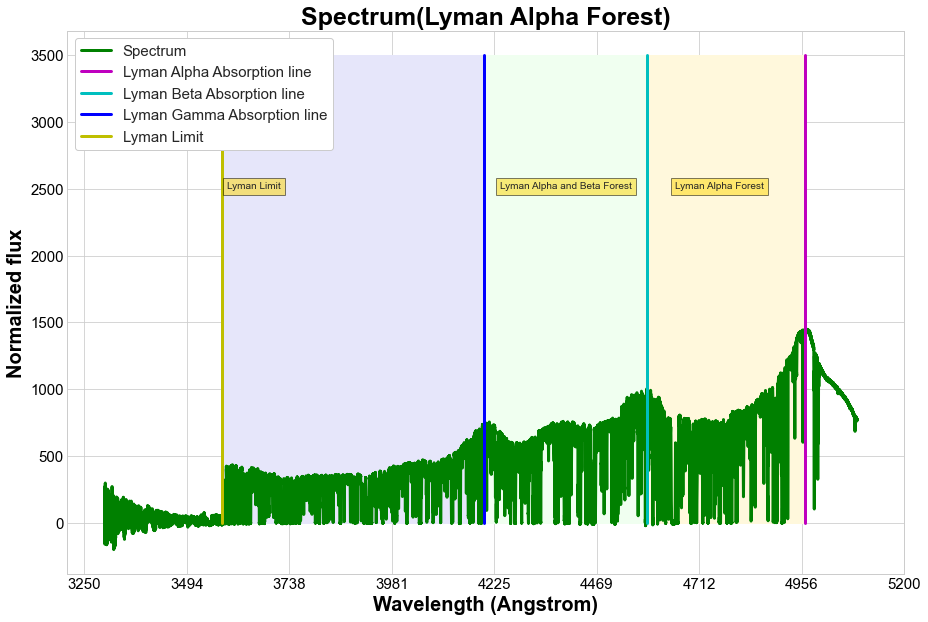

In [31]:
#OBSERVATIONS ON LEFT HALF OF SPECTRUM:
Xaxis = lamda[0:74547]
Yaxis = nflux[0:74547]
#plotting different absorption forests:
fig, ax1 = plt.subplots(figsize=(15,10))
ax1.plot(Xaxis,Yaxis,'g-',linewidth='3',label ='Spectrum')
ax1.plot(X1,Y1,'m-',linewidth='3',label ='Lyman Alpha Absorption line')
ax1.plot(X2,Y2,'c-',linewidth='3',label ='Lyman Beta Absorption line')
ax1.plot(X4,Y4,'b-',linewidth='3',label ='Lyman Gamma Absorption line')
ax1.plot(X3,Y3,'y-',linewidth='3',label ='Lyman Limit')
lym_limit = matplotlib.patches.Rectangle((3577.68,0),4200-3577.68,3500, color='lavender')
ax1.add_patch(lym_limit)
lym_beta = matplotlib.patches.Rectangle((4200,0),4587.41-4200,3500, color='honeydew')
ax1.add_patch(lym_beta)
lym_alpha = matplotlib.patches.Rectangle((4587.41,0),4964.47-4587.41,3500, color='cornsilk')
ax1.add_patch(lym_alpha)
plt.text(4655,2500.0,'Lyman Alpha Forest',bbox=dict(facecolor='gold', alpha=0.5))
plt.text(4240,2500.0,"Lyman Alpha and Beta Forest",bbox=dict(facecolor='gold', alpha=0.5))
plt.text(3590,2500.0,'Lyman Limit',bbox=dict(facecolor='gold', alpha=0.5))
plt.title("Spectrum(Lyman Alpha Forest)",fontsize=25,fontweight='bold', color="black")
plt.xlabel("Wavelength (Angstrom)",fontsize=20,fontweight='bold',color="black")
plt.ylabel("Normalized flux",fontsize=20,fontweight='bold',color="black")
plt.xticks(np.linspace(3250,5200,9),fontsize=15, color="black")
plt.yticks(np.linspace(0,3500,8),fontsize=15, color="black")
plt.legend(loc = "upper left",fontsize=15,framealpha=1, frameon=True)
plt.savefig("PLOTe")
plt.show()

In [32]:
#OBSERVATIONS ON RIGHT HALF OF SPECTRUM:

#THEORTICAL WAVELENGTHS OF THE MOST DISTINCT EMISSION LINES OF THE COMPOSITE QUASAR:
lamda_Lyalpha = 1215.67
lamda_CIV    = 1546.15
lamda_CIII   = 1905.97
lamda_MgII   = 2800.26
lamda_Hbeta  = 4862.66
lamda_OIII   = 4960.36
lamda_OIII2  = 5008.22
lamda_Halpha = 6564.93

#SHIFTED WAVLENGTHS:

def shift(X):
    Y = (1+ Redshift)*(X)
    return(Y)

l1 = shift(lamda_Lyalpha)
l2 = shift(lamda_CIV)
l3 = shift(lamda_CIII)
l4 = shift(lamda_MgII)
l5 = shift(lamda_Hbeta)
l6 = shift(lamda_OIII)
l7 = shift(lamda_OIII2)
l8 = shift(lamda_Halpha)
print(l1,l2,l3,l4,l5,l6,l7,l8)

[4964.47] [6314.06162075] [7783.46992679] [11435.51026364] [19857.79832537] [20256.77890316] [20452.22629776] [26809.41212426]


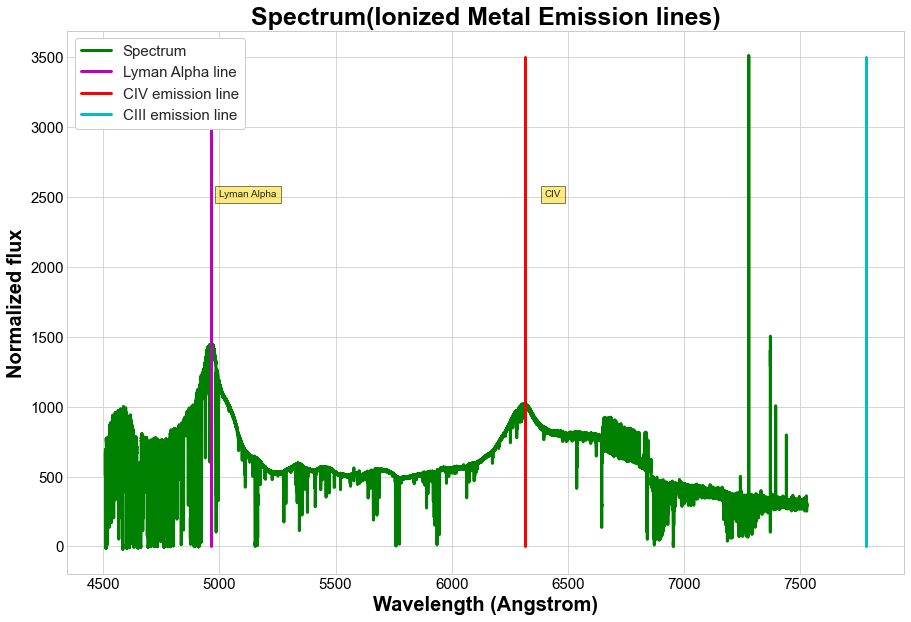

Emission line of CIV found


In [33]:
p1a = [4964.47,0]
p1b = [4964.47,3500]
p2a = [6314.06162075,0]
p2b = [6314.06162075,3500]
p3a = [7783.46992679,0]
p3b = [7783.46992679,3500]
X1a = [p1a[0],p1b[0]]
Y1a = [p1a[1],p1b[1]]
X2a = [p2a[0],p2b[0]]
Y2a = [p2a[1],p2b[1]]
X3a = [p3a[0],p3b[0]]
Y3a = [p3a[1],p3b[1]]
#OBSERVATIONS ON LEFT HALF OF SPECTRUM:
Xaxis2 = lamda[51492:164553]
Yaxis2 = nflux[51492:164553]
#plotting different absorption forests:
fig, ax1 = plt.subplots(figsize=(15,10))
ax1.plot(Xaxis2,Yaxis2,'g-',linewidth='3',label ='Spectrum')
ax1.plot(X1a,Y1a,'m-',linewidth='3',label ='Lyman Alpha line')
ax1.plot(X2a,Y2a,'r',linewidth='3',label ='CIV emission line')
ax1.plot(X3a,Y3a,'c',linewidth='3',label ='CIII emission line')
plt.text(5000,2500.0,'Lyman Alpha',bbox=dict(facecolor='gold', alpha=0.5))
plt.text(6400,2500.0,'CIV',bbox=dict(facecolor='gold', alpha=0.5))
plt.title("Spectrum(Ionized Metal Emission lines)",fontsize=25,fontweight='bold', color="black")
plt.xlabel("Wavelength (Angstrom)",fontsize=20,fontweight='bold',color="black")
plt.ylabel("Normalized flux",fontsize=20,fontweight='bold',color="black")
plt.xticks(np.linspace(4500,7500,7),fontsize=15, color="black")
plt.yticks(np.linspace(0,3500,8),fontsize=15, color="black")
plt.legend(loc = "upper left",fontsize=15,framealpha=1, frameon=True)
plt.savefig("PLOTf")
plt.show()
print("Emission line of CIV found")

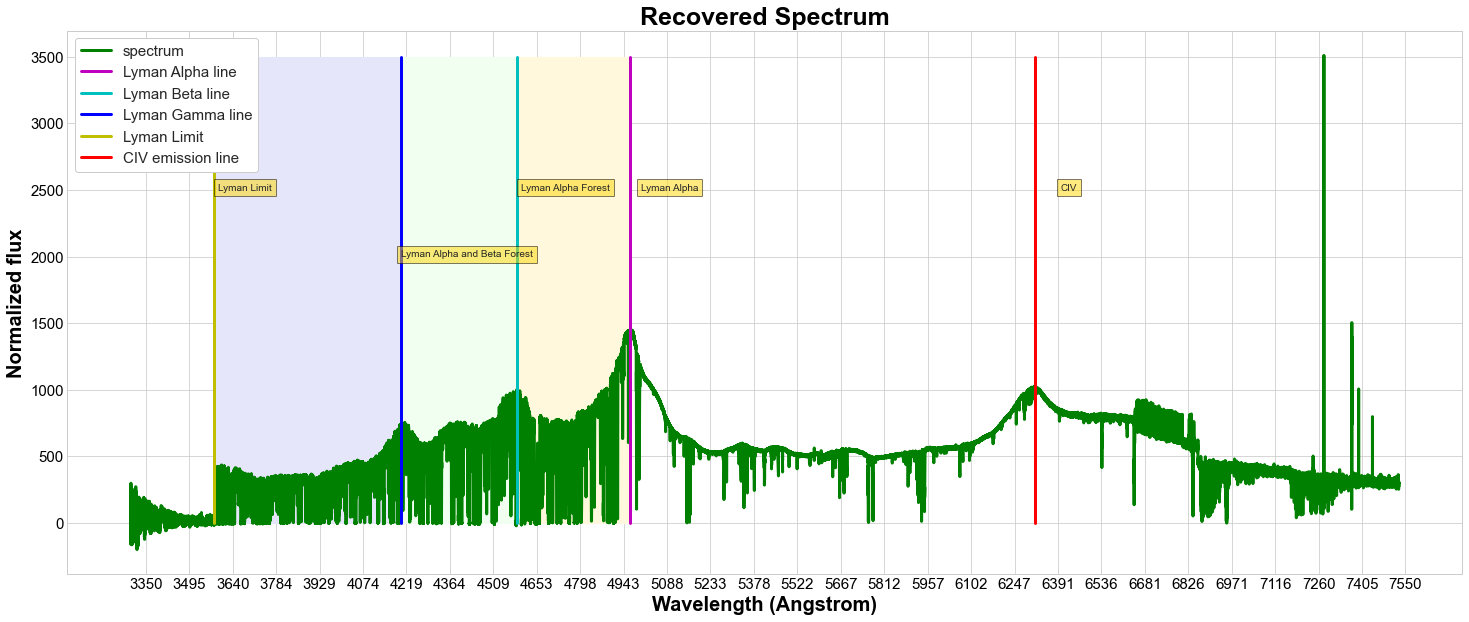

In [34]:
#FINAL PLOT:
fig, ax1 = plt.subplots(figsize=(25,10))
ax1.plot(lamda,nflux,'g-',linewidth='3',label ='spectrum')
ax1.plot(X1,Y1,'m-',linewidth='3',label ='Lyman Alpha line')
ax1.plot(X2,Y2,'c-',linewidth='3',label ='Lyman Beta line')
ax1.plot(X4,Y4,'b-',linewidth='3',label ='Lyman Gamma line')
ax1.plot(X3,Y3,'y-',linewidth='3',label ='Lyman Limit')
ax1.plot(X2a,Y2a,'r',linewidth='3',label ='CIV emission line')
plt.text(5000,2500.0,'Lyman Alpha',bbox=dict(facecolor='gold', alpha=0.5))
plt.text(6400,2500.0,'CIV',bbox=dict(facecolor='gold', alpha=0.5))
lym_limit = matplotlib.patches.Rectangle((3577.68,0),4200-3577.68,3500, color='lavender')
ax1.add_patch(lym_limit)
lym_beta = matplotlib.patches.Rectangle((4200,0),4587.41-4200,3500, color='honeydew')
ax1.add_patch(lym_beta)
lym_alpha = matplotlib.patches.Rectangle((4587.41,0),4964.47-4587.41,3500, color='cornsilk')
ax1.add_patch(lym_alpha)
plt.text(4600,2500.0,'Lyman Alpha Forest',bbox=dict(facecolor='gold', alpha=0.5))
plt.text(4200,2000.0,"Lyman Alpha and Beta Forest",bbox=dict(facecolor='gold', alpha=0.5))
plt.text(3590,2500.0,'Lyman Limit',bbox=dict(facecolor='gold', alpha=0.5))
plt.title("Recovered Spectrum",fontsize=25,fontweight='bold', color="black")
plt.xlabel("Wavelength (Angstrom)",fontsize=20,fontweight='bold',color="black")
plt.ylabel("Normalized flux",fontsize=20,fontweight='bold',color="black")
plt.xticks(np.linspace(3350,7550,30),fontsize=15, color="black")
plt.yticks(np.linspace(0,3500,8),fontsize=15, color="black")
plt.legend(loc = "upper left",fontsize=15,framealpha=1, frameon=True)
plt.savefig("PLOTd")
plt.show()

In [35]:
#COSMOLOGY ASSIGNMENT : COSMOLOGY CALCULATOR.

#importing necessary libraries:
import numpy as np
from scipy import integrate

#input of various parameters:
#PARAMETERS:
Ho = 69.7             #in Km/s/Mpc
Wm = 0.284            #Matter density parameter
Wl = 0.714            #Dark Energy density parameter
Wk = 0                #Curvature density parameter
Wr = 0                #Radiation density parameter
Z  = Redshift
c  = 3* 10**(8)       # in m sec^ -1


def calc(Z,Wm,Wl,Wk,Wr,Ho):
    #Age of the universe for user input redshift (in Gyears)
    #Look back time for user input redshift (in Gyears)
    
    def TIME(Z):
        return ( 1/( (1+Z)*(((Wm*((1+Z)**3)) + (Wr*((1+Z)**4)) + Wl + (Wk*((1+Z)**2)))**(1/2)) ) )
    t0,err = integrate.quad(TIME,0,np.inf)
    T0     = t0*( 3.08*(10**(19)) )/(Ho*3.15 * (10**(16)))            #in Giga years
    tz,err = integrate.quad(TIME,Z,100000)
    Tz     = tz*( 3.08*(10**(19)) )/(Ho*3.15 * (10**(16)))            #in Giga years
    del_T  = (T0 - Tz)
    print("Age of the universe : ",np.round(Tz,3),"Gyears")
    print("Look back time : ",np.round(del_T,3),"Gyears")
    
    #Comoving radial distance to user input redshift (in MPC)
    #Angular diameter distance to user input redshift (in MPC)
    #Angular scale at user input redshift (kpc/arcsec)
    #Luminosity distance to user input redshift (in MPC)

    def fun(Z,Wm,Wl,Wk,Wr):
        return(1*( 3.08*(10**(19)) )/(((Wm*((1+Z)**3)) + (Wr*((1+Z)**4)) + Wl + (Wk*((1+Z)**2)))**(1/2)))

    r,err = integrate.quad(fun,0,Z,args=(Wm,Wl,Wk,Wr))
    rc = r*c/(Ho*3.08* 10**(22))              #(in MPC)
    dl = (r*c*(1+Z))/(Ho*3.08* 10**(22))      #(in MPC)
    da = (r*c)/(Ho*(1+Z)*(3.08* 10**(22)))    #(in MPC)
    ang = (da*(10**3))/(206265)

    print("Comoving radial distance : ",np.round(rc,3),"Mpc")
    print("Angular diameter distance :",np.round(da,3),"Mpc")
    print("Angular scale at user input redshift : ",np.round(ang,3),"kpc/arcsec")
    print("Luminosity distance to user input redshift : ",np.round(dl,3),"Mpc")
    
    #Temperature of CMB at user input redshift(K):

    Temp0 = 2.7
    Tcmb  = Temp0*(1+Z) #in Kelvin
    print("Temperature of CMB at user input redshift : ",np.round(Tcmb,3),"K")

print("RESULTS:\n")
calc(Z,Wm,Wl,Wk,Wr,Ho)

RESULTS:

Age of the universe :  2.114 Gyears
Look back time :  11.625 Gyears
Comoving radial distance :  6575.416 Mpc
Angular diameter distance : [1610.149] Mpc
Angular scale at user input redshift :  [7.806] kpc/arcsec
Luminosity distance to user input redshift :  [26852.235] Mpc
Temperature of CMB at user input redshift :  [11.026] K
